Another approach could have been deducting both the seasonal MA and seasonal residuals from the original series and checking for randomness of the final residuals. This approach assumes that the beer production series is an additive sum of the trend-cycle and seasonal components and what is left after removing the aforementioned two are random variations.

Moving averages of the form n x F(m) have the property of smoothing the original time series and giving an estimation of the trend cycle component. Choice of m and n are crucial for determining the trend-cycle component. 

m is the periodicity of the seasonal data and is known apriori or determined through exploratory data analysis

If m is even, F(m) moving averages would be asymmetric and therefore lack the necessary smoothing properties over successive occurrences of the seasons. Hence, moving averages are taken for the second time to generate 2 x F(m) series which has the necessary seasonal smoothing and gives a better estimate of the trend-cycle component. 

However in case of odd periodicity, F(m) is used as the estimate of the trend-cycle component. Therefore, estimate of the trend cycle component is F = 2xF(m) or F(m) depending on whether m is even or odd.

In time series decomposition using moving averages, the seasonal component is assumed to be constant. Estimate of the seasonal component is generated by taking season-wise average of the residuals left after trend-cycle adjustment.

The computations will slightly differ between an additive and multiplicative model.

upon estimation of the trend-cycle component F by application of a suitable
moving average, the residuals for an additive model is calculated by x - F, whereas for a multiplicative model, residuals are x/F. The seasonal component S is now estimated from the residuals as season wise averages

the irregular variations are obtained by making trend-cycle and seasonal adjustment of the original series as follows:

For an additive decomposition model: e = x - F - S
For a multiplicative decomposition model: e = x/F x S

In [1]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
from statsmodels.tsa import stattools
%matplotlib notebook
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Set current directory and work relative to it
os.chdir('E:/gitlab/project_on_python/deep time series forcasting/Practical-Time-Series-Analysis-master')

In [3]:
"""
This notebook illustrates time series decomposition by moving averages.
Both additive and multiplicative models are demonstrated.
"""

'\nThis notebook illustrates time series decomposition by moving averages.\nBoth additive and multiplicative models are demonstrated.\n'

In [4]:
"""
Let us demonstrate the addtive model using US Airlines monthly miles flown dataset.
"""

'\nLet us demonstrate the addtive model using US Airlines monthly miles flown dataset.\n'

In [5]:
#read the data from into a pandas.DataFrame
air_miles = pd.read_csv('datasets/us-airlines-monthly-aircraft-miles-flown.csv')
air_miles.index = air_miles['Month']

In [6]:
#Let's find out the shape of the DataFrame
print('Shape of the DataFrame:', air_miles.shape)

Shape of the DataFrame: (97, 2)


In [7]:
#Let's see first 10 rows of it
air_miles.head(10)

,Month,U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970
Month,,
1963-01,1963-01,6827.0
1963-02,1963-02,6178.0
1963-03,1963-03,7084.0
1963-04,1963-04,8162.0
1963-05,1963-05,8462.0
1963-06,1963-06,9644.0
1963-07,1963-07,10466.0
1963-08,1963-08,10748.0
1963-09,1963-09,9963.0


In [8]:
#Let's rename the 2nd column
air_miles.rename(columns={'U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970':\
                          'Air miles flown'},inplace=True)

In [9]:
#Check for missing values and remove the row
missing = pd.isnull(air_miles['Air miles flown'])
print('Number of missing values found:', missing.sum())
air_miles = air_miles.loc[~missing, :]

Number of missing values found: 1


# estimate the trend component

In [10]:
#Let us estimate the trend component by 2X12 monthly moving average
MA12 = air_miles['Air miles flown'].rolling(window=12).mean()
trendComp = MA12.rolling(window=2).mean()

# For the additive model

For the additive model, the seasonal component is obtained by subtracting the trend-cycle from the original time series and taking month wise averages for the residuals

In [11]:
#Let us now compute the residuals after removing the trend component
residuals = air_miles['Air miles flown'] - trendComp

#To find the sesonal compute we have to take monthwise average of these residuals
month = air_miles['Month'].map(lambda d: d[-2:]) #label for every month
monthwise_avg = residuals.groupby(by=month).aggregate(['mean'])
#Number of years for which we have the data
nb_years = 1970-1963+1

#make matrix for every label month
seasonalComp = np.array([monthwise_avg.as_matrix()]*nb_years).reshape((12*nb_years,))

In [22]:
#After deducting the trend and seasonal component we are left with irregular variations
irr_var = air_miles['Air miles flown'] - trendComp - seasonalComp

<IPython.core.display.Javascript object>


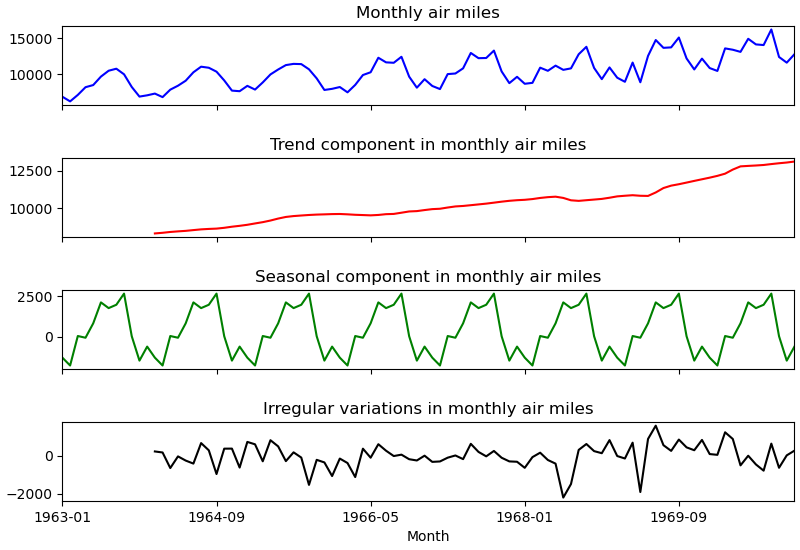

In [23]:
#Plot the original time series, trend, seasonal and random components
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(8, 5.5)

air_miles['Air miles flown'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Monthly air miles')

pd.Series(data=trendComp, index=air_miles.index).plot(ax=axarr[1], color='r', linestyle='-')
axarr[1].set_title('Trend component in monthly air miles')

pd.Series(data=seasonalComp, index=air_miles.index).plot(ax=axarr[2], color='g', linestyle='-')
axarr[2].set_title('Seasonal component in monthly air miles')

pd.Series(data=irr_var, index=air_miles.index).plot(ax=axarr[3], color='k', linestyle='-')
axarr[3].set_title('Irregular variations in monthly air miles')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

# plt.savefig('plots/ch2/B07887_02_20.png', format='png', dpi=300)
plt.show()

ADF test on the irr_var gives a p-value of 0.0658. At confidence level of 90% (alpha=0.10), the null hypothesis on stationarity of the irregular variations can be accepted.

In [24]:
#Run ADF test on the irregular variations
adf_result = stattools.adfuller(irr_var.loc[~pd.isnull(irr_var)], autolag='AIC')

In [25]:
print('p-val of the ADF test on irregular variations in air miles flown:', adf_result[1])

p-val of the ADF test on irregular variations in air miles flown: 0.06577411025730114


In [31]:
"""
The additive decompostion has been able to reduce the p-value
from 0.99 in case of the original time series
(as shown in Chapter_2_Augmented_Dickey_Fuller_Test.ipynb)
to 0.066 after decomposing.
"""

'\nThe additive decompostion has been able to reduce the p-value\nfrom 0.99 in case of the original time series\n(as shown in Chapter_2_Augmented_Dickey_Fuller_Test.ipynb)\nto 0.066 after decomposing.\n'

#  multiplicative model

In [26]:
"""
Now we will attempt decomposition of the original time
using a multiplicative model
"""

'\nNow we will attempt decomposition of the original time\nusing a multiplicative model\n'

In [27]:
"""
Computation of the trend-cycle component remain same. But the seasonal component
is estimated as follows
"""

'\nComputation of the trend-cycle component remain same. But the seasonal component\nis estimated as follows\n'

seasonal calculate from residual from removing trend component in raw data

Notice that the seasonal residuals are dividing the trend-cycle component from the original time series in case of a multiplicative model. However, the group-by operation on the residuals remain the same.

In [28]:
#We start with the residuals left after removing the trend component
residuals = air_miles['Air miles flown'] / trendComp

#To find the sesonal compute we have to take monthwise average of these residuals
month = air_miles['Month'].map(lambda d: d[-2:])
monthwise_avg = residuals.groupby(by=month).aggregate(['mean'])
#Number of years for which we have the data
nb_years = 1970-1963+1

seasonalComp = np.array([monthwise_avg.as_matrix()]*nb_years).reshape((12*nb_years,))

In [29]:
#After adjusting the trend and seasonal component we are left with irregular variations
irr_var = air_miles['Air miles flown'] / (trendComp * seasonalComp)

<IPython.core.display.Javascript object>


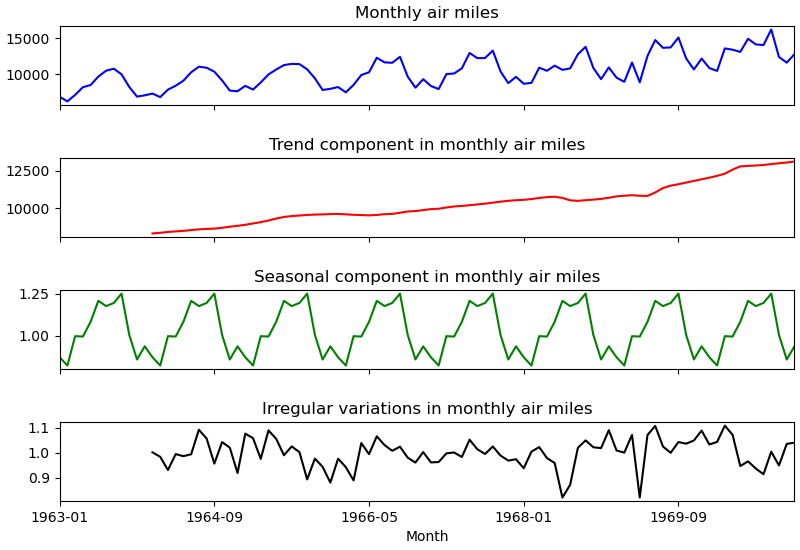

In [30]:
#Plot the original time series, trend, seasonal and random components
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(8, 5.5)

air_miles['Air miles flown'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Monthly air miles')

pd.Series(data=trendComp, index=air_miles.index).plot(ax=axarr[1], color='r', linestyle='-')
axarr[1].set_title('Trend component in monthly air miles')

pd.Series(data=seasonalComp, index=air_miles.index).plot(ax=axarr[2], color='g', linestyle='-')
axarr[2].set_title('Seasonal component in monthly air miles')

pd.Series(data=irr_var, index=air_miles.index).plot(ax=axarr[3], color='k', linestyle='-')
axarr[3].set_title('Irregular variations in monthly air miles')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

# plt.savefig('plots/ch2/B07887_02_21.png', format='png', dpi=300)
plt.show()

ADF test on irregular variations obtained from the multiplicative model gives a p-value of approximately 0.00018, which is much lesser than that obtained from the additive model.

In [31]:
#Run ADF test on the irregular variations
adf_result = stattools.adfuller(irr_var.loc[~pd.isnull(irr_var)], autolag='AIC')

In [32]:
print('p-val of the ADF test on irregular variations in air miles flown:', adf_result[1])

p-val of the ADF test on irregular variations in air miles flown: 0.00017645280908370881


In [40]:
"""
Voila! The p-val has further reduced to 0.000176.
The null hypothesis about non-stationarity of the irregular variations
can be rejected at even a level of confidence of 99 % (alpha=0.01).
This shows that the original time series has been de-stationarized to
the stationary irregular variations. Besides we have estimates of both trend-cycle
and seasonal components.
"""

'\nVoila! The p-val has further reduced to 0.000176.\nThe null hypothesis about non-stationarity of the irregular variations\ncan be rejected at even a level of confidence of 99 % (alpha=0.01).\nThis shows that the original time series has been de-stationarized to\nthe stationary irregular variations. Besides we have estimates of both trend-cycle\nand seasonal components.\n'